In [1]:
from src import utils_module
from src import preprocessing_module
import importlib

# from 
df = utils_module.load_data( path_data="data/",
                name_csv_features="features.csv",
                name_csv_labels="labels.csv",
                delay=150,
                labeled_data_step=600000,      
                traking=True
                )

# reload the module
importlib.reload(preprocessing_module)

data_arr = preprocessing_module.conver_datframe_to_numpy(df,
                        columns=["X", "Y", "Z"],
                        debug=True,
                        traking=True)
                        
label_arr = preprocessing_module.conver_datframe_to_numpy(
    df,
                        columns=["label"],
                        debug=True,
                        traking=True)
                        


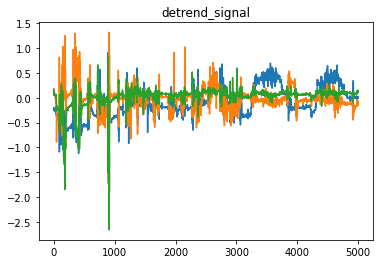

In [3]:
from src import preprocessing_module
import importlib

# reload the module
importlib.reload(preprocessing_module)
detrend = preprocessing_module.detrend_signal(   data_arr,
                                                traking=True, 
                                                viz=True, 
                                                start=50000, 
                                                end=55000)

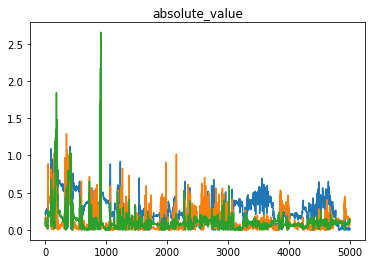

In [4]:
from src import preprocessing_module
import importlib

# reload the module
importlib.reload(preprocessing_module)
absolute_value = preprocessing_module.absolute_value(   detrend,
                                                traking=True,
                                                viz=True,
                                                start=50000,
                                                end=55000)
                                                

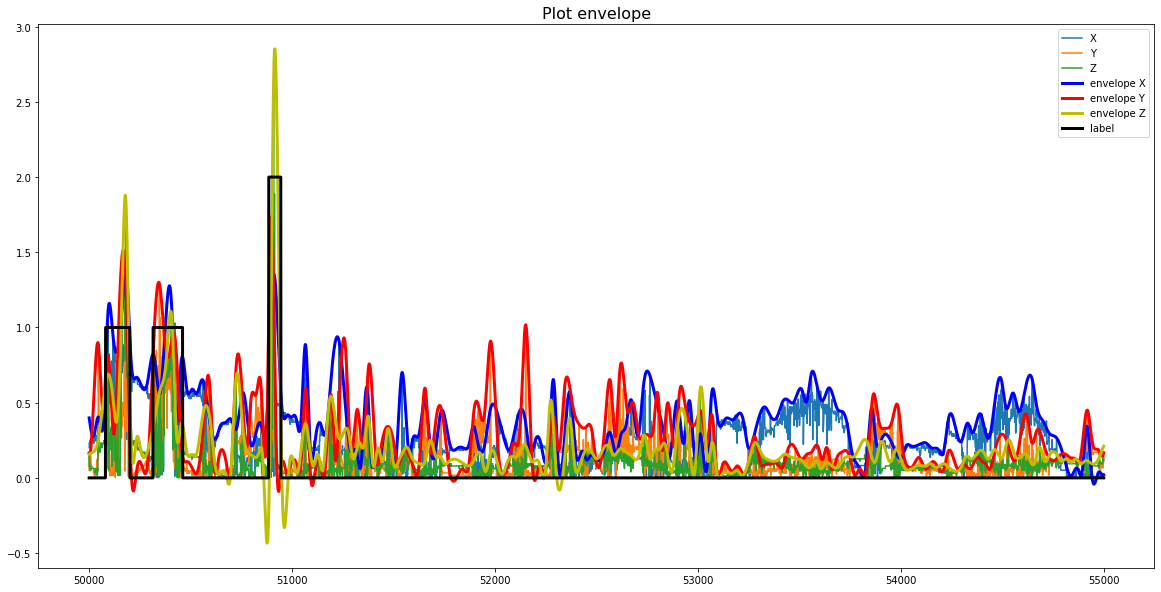

In [6]:
from src import preprocessing_module
import importlib  
import numpy as np  
import matplotlib.pyplot as plt

# Parameter interpolation ----------------------------------------------
interpolation = 20

importlib.reload(preprocessing_module)
data_eng = preprocessing_module.feature_engineering(  absolute_value,
                                    # label_arr,
                                    interpolation=interpolation,
                                    traking=True,
                                    debug=False
                                    )

a = preprocessing_module.envelope_aux(absolute_value, interpolation)
x = np.arange(len(data_arr))

# Visualization interpolation  ----------------------------------------------
graph = True
start = 50000
end = 55000
if graph:
    # plot a
    plt.figure(figsize=(20,10))
    plt.title('Plot envelope',fontsize=16)
    plt.plot(x[start:end], absolute_value[start:end], label='envelope')
    plt.plot(x[start:end], a[0][start:end],color='b',linewidth=3)   
    plt.plot(x[start:end], a[1][start:end],color='r',linewidth=3)
    plt.plot(x[start:end], a[2][start:end],color='y',linewidth=3)
    plt.plot(x[start:end], label_arr[start:end],color='black',linewidth=3)
    # legend column 1 is X, column 2 is Y, column 3 is Z
    plt.legend(['X', 'Y', 'Z','envelope X', 'envelope Y', 'envelope Z', 'label'], loc='upper right')
    plt.show()

In [8]:
from src import utils_module
import importlib

# reload the module
importlib.reload(utils_module)
# Data engineering ----------------------------------------------
names_new_columns = ['x_env','y_env','z_env']
new_df = utils_module.arr_to_dataframe(data_eng, df, names_new_columns)
new_df.head()

,x_env,y_env,z_env,X,Y,Z,label
0,0.000000,0.000000,0.000000,-0.062,-0.250,0.000,0
1,0.011482,0.007625,-0.028244,-0.062,-0.203,-0.031,0
2,0.023398,0.016000,-0.050077,-0.047,-0.219,0.047,0
3,0.035703,0.025086,-0.065807,-0.078,-0.188,-0.016,0
4,0.048354,0.034845,-0.075743,-0.078,-0.172,-0.031,0


0    588810
2      7028
1      4162
Name: label, dtype: int64


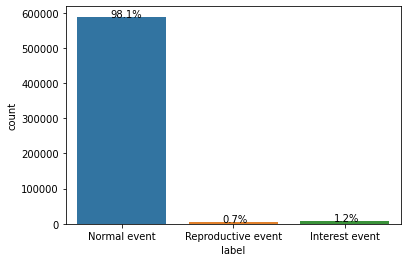

In [14]:
from src import preprocessing_module
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import importlib
import seaborn as sns
import warnings


# reload the module
importlib.reload(preprocessing_module)
# Norm data ----------------------------------------------
column_scale = ["x_env", "y_env", "z_env", 'X', 'Y', 'Z']
column_labels = ["label"]
df_sc = preprocessing_module.normalize_data( new_df,
                        columns_scale=column_scale, 
                        columns_labels=column_labels, 
                        is_dataframe=True, 
                        type_normalization=MinMaxScaler,
                        # traking=False,
                        # debug=False
                        )
# df_sc.head()

graph = True
if graph:
    print(df_sc["label"].value_counts())
    CLASS_NORMAL = 0
    class_names = ['Normal event','Reproductive event','Interest event']

    ax = sns.countplot(df_sc.label);
    ax.set_xticklabels(class_names); 
    # use percentage instead of count
    total = len(df_sc.label)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y))
        # ignore Future warnings
        warnings.simplefilter(action='ignore', category=FutureWarning)


In [16]:
import pandas as pd
from src import preprocessing_module
import importlib

# reload the module
importlib.reload(preprocessing_module)

df_sc.shape

# Data processing -------------------------------------------

interpolation = 20
arr_0, arr_1, arr_2, min_class = preprocessing_module.preposses_balanced(
                                                        df_sc, 
                                                        width_windows = 20, 
                                                        stride_windows =20, 
                                                        debug=False
                                                        )



c:\Users\crist\Documents\Biology\QLA002 Panchito\V2\src\preprocessing_module.py:384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window.loc[:, 'label'] = label #--------------------------------


In [17]:
arr_0.shape

(229, 20, 6)

In [20]:
from src import utils_module
import importlib

# reload the module
importlib.reload(utils_module)
# # generate labels data ----------------------------------------------
y_train_0, y_train_1, y_train_2 = utils_module.create_labels(min_class, debug=True)

-----------------5----------------------

 y_train_0 shape :  (229,) 
 y_train_1 shape :  (229,) 
 y_train_2 shape :  (229,)
-----------------5----------------------

 y_test_0 shape :  (229,) 
 y_test_1 shape :  (229,) 
 y_test_2 shape :  (229,)


In [25]:
y_train_0.shape

(229,)

In [21]:
from src import procesiong_module
import importlib

# reload the module
importlib.reload(procesiong_module)


# # split data --------------------------------------------------------
X_train, X_test, y_train, y_test = procesiong_module.split_data(
                        (arr_0, arr_1, arr_2), 
                        (y_train_0, y_train_1, y_train_2), 
                        debug=False
                        )


------------X_train.shape-----------------

 X_train_0 shape :  (183, 20, 6) 
 X_train_1 shape :  (183, 20, 6) 
 X_train_2 shape :  (183, 20, 6)
------------X_test.shape---------------

 X_test_0 shape :  (46, 20, 6) 
 X_test_1 shape :  (46, 20, 6) 
 X_test_2 shape :  (46, 20, 6)
------------y_train.shape-----------------

 y_train_0 shape :  (183,) 
 y_train_1 shape :  (183,) 
 y_train_2 shape :  (183,)
------------y_test.shape---------------

 y_test_0 shape :  (46,) 
 y_test_1 shape :  (46,) 
 y_test_2 shape :  (46,)
------------X_train.shape-----------------

 X_train shape :  (549, 20, 6)
------------X_test.shape---------------

 X_test shape :  (138, 20, 6)
------------y_train.shape-----------------

 y_train shape :  (549,)
------------y_test.shape---------------

 y_test shape :  (138,)


In [22]:
from src import deep_learning_module
import importlib

# reload the module
importlib.reload(deep_learning_module)

# # reshape data --------------------------------------------------------
num_classes = 3 #cantidad de clases 
input_shape_dataset = (X_train[1], X_train[2], 1) # Es necesario agregar el 1 para que el modelo sepa que es una imagen en escala de grises

print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")

X_train, X_test = deep_learning_module.reshape_data_cnn(X_train, X_test, debug=False)

print(f"x_train reshape: {X_train.shape} - y_train reshape: {y_train.shape}")

x_train shape: (549, 20, 6) - y_train shape: (549,)
x_test shape: (138, 20, 6) - y_test shape: (138,)
x_train reshape: (549, 20, 6, 1) - y_train reshape: (549,)


In [23]:
input_shape_dataset = (X_train.shape[1], X_train.shape[2], 1)
num_classes = 3

In [24]:
# run the experiment with mlflow like a function ----------------------------------------------
from tensorflow.keras.optimizers import Adam
from src import deep_learning_module
import importlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score
import mlflow
import datetime


importlib.reload(deep_learning_module)

def run_experiment_cnn_t(X_train, y_train, X_test, y_test, epochs=10, batch_size=32, debug=False, 
        optimizer = Adam, learning_rate = 0.005, metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy'):
    with mlflow.start_run() as run:

        model = deep_learning_module.create_model_cnn_basic(input_shape_dataset, num_classes, debug=False)

        mlflow.log_param("input_shape_dataset", input_shape_dataset)
        mlflow.log_param("num_classes", num_classes)
        mlflow.log_param("num_layers_conv", 1)
        mlflow.log_param("num_layers_dense", 1)

        # create the compile
        model.compile(  optimizer=Adam(learning_rate=learning_rate),
                         loss=loss, 
                         metrics=metrics)


        mlflow.log_param("optimizer", optimizer)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("metrics", metrics)
        mlflow.log_param("loss", loss)

        # log interpolation
        mlflow.log_param("interpolation", interpolation)

        # fit model
        history = model.fit(X_train, y_train,
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_data=(X_test, y_test),
                         verbose=0)
        # log params
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("batch_size", batch_size)
        # fit model
        history = model.fit(    X_train, 
                                y_train,    
                                epochs=epochs, 
                                batch_size=batch_size, 
                                validation_data=(X_test, y_test),
                                verbose=0)
        
        # log model
        mlflow.tensorflow.log_model(model, "model")

        # log metrics
        mlflow.log_metric("loss", history.history['loss'][-1])
        mlflow.log_metric("accuracy", history.history['accuracy'][-1])
        mlflow.log_metric("val_loss", history.history['val_loss'][-1])
        mlflow.log_metric("val_accuracy", history.history['val_accuracy'][-1])

        # log artifacts TODO

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        # grid on
        plt.grid()        
        	
        plt.savefig('Accuracy.png', dpi=300)  # no se exactamento donde lo guarda por lo que no puedo guardar en articafts
        mlflow.log_artifact('Accuracy.png') # Esta linea no entrega falso

        # make a prediction
        y_pred = model.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)

        # save y_pred to csv
        # np.savetxt('y_pred.csv', y_pred, delimiter=',')
        # mlflow.log_artifact('y_pred.csv')

        # log confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots(figsize=(10,10))
        sns.heatmap(cm, annot=True, fmt="d");
        plt.figure(figsize=(10,10))
        plt.title("Confusion matrix")
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.savefig('confusion_matrix.png', dpi=300)
        mlflow.log_artifact('confusion_matrix.png')

        # save the model trained, with name model "interpotation value" .h5, and timestamp
        timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        model.save("model"+str(interpolation)+timestamp+".h5")
        # model.save('model.h5')

        # curve roc TODO



        if debug:
            print("run_id: {}".format(run.info.run_id))
            print("artifacts_uri: {}".format(run.info.artifact_uri))
    return history

5/5 [==============================] - 0s 2ms/step


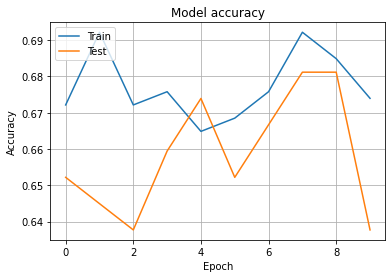

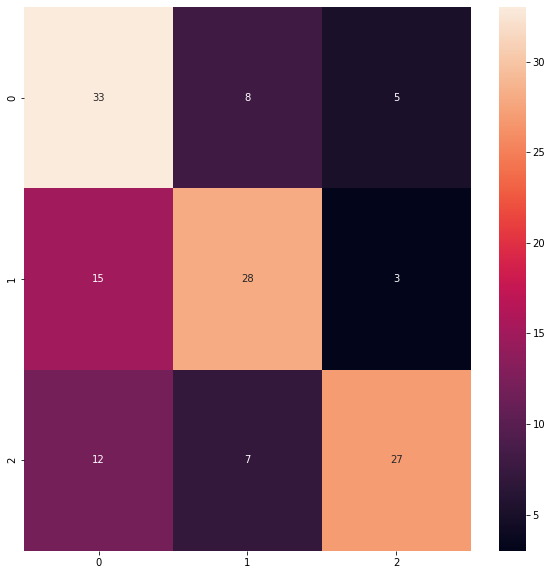

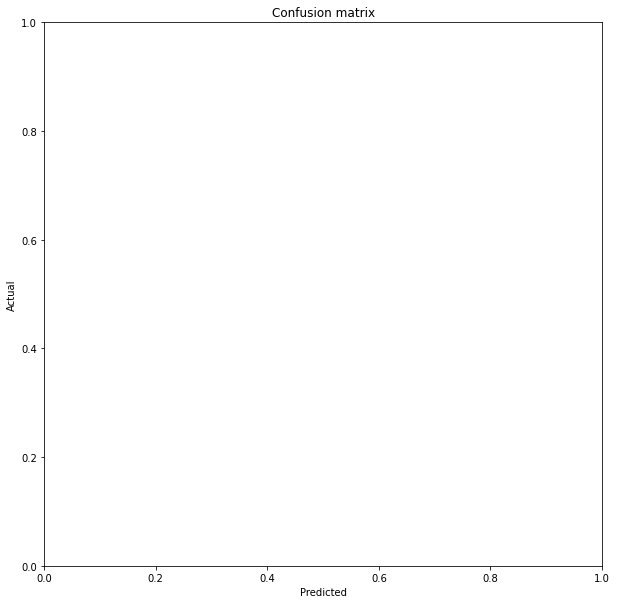

In [38]:
run_experiment_cnn_t(X_train, y_train, X_test, y_test, epochs=10, batch_size=32, debug=False,)

In [30]:
input_shape_dataset

(20, 6, 1)

In [34]:

num_classes

3

5/5 [==============================] - 0s 2ms/step


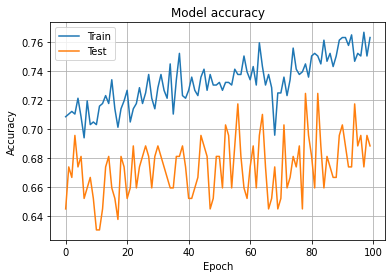

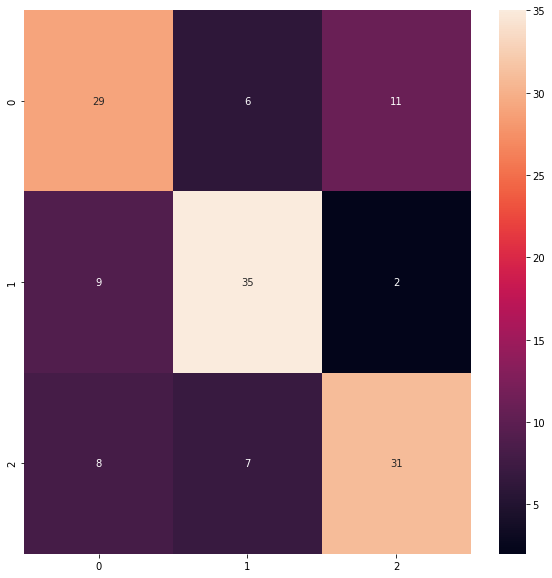

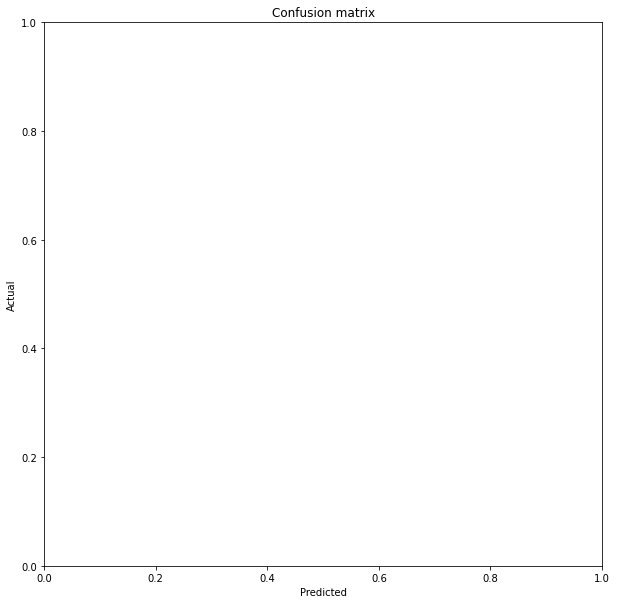

In [39]:
from src import deep_learning_module
import importlib

importlib.reload(deep_learning_module)
history = deep_learning_module.run_experiment_cnn(  input_shape_dataset,
                                                    X_train, 
                                                    y_train, 
                                                    X_test, 
                                                    y_test, 
                                                    epochs=100, 
                                                    batch_size=256, 
                                                    debug=False,
                                                    optimizer = Adam,
                                                    learning_rate=0.001,
                                                    metrics = ['accuracy'],
                                                    loss = 'sparse_categorical_crossentropy')
